#  Báo cáo cuối kỳ môn Học máy
#  Đề tài: PetFinder.my Adoption Prediction
#  Thực hiện: Bạch Quang Hiệu - 18020523


## Mô tả bài toán

### Tập dữ liệu:



### train.csv - bao gồm dữ liệu huấn luyện, đây là tập dữ liệu có nhãn đích mà chúng ta có thể sử dụng để huấn luyện các mô hình của mình;
###    test.csv - bao gồm dữ liệu thử nghiệm, không có nhãn đích, dữ liệu này sẽ được sử dụng để gửi Kaggle;
###    Tệp siêu dữ liệu hình ảnh - tập hợp các tệp json, với đầu ra là phân tích hình ảnh do đơn vị tổ chức cuộc thi cung cấp;
###    Tệp dữ liệu tình cảm - tập hợp các tệp json, với đầu ra là phân tích tình cảm trên trường Mô tả;
###    Tệp hình ảnh - tệp hình ảnh cho từng danh sách, dựa trên đó phân tích hình ảnh được thực hiện.

### Trong train.csv, các tính năng sau được bao gồm:



*     PetID - ID đại diện cho một con vật cưng, điều này có thể được sử dụng để lập bản          đồ kết quả phân tích cảm xúc và hình ảnh vật nuôi cho một con vật cưng cụ thể;
*    AdoptionSpeed ​​- Đây là nhãn mục tiêu được sử dụng để đào tạo và dự đoán, nó có            giá trị nguyên từ 0 đến 4. 0 có nghĩa là vật nuôi được nhận nuôi vào ngày nó được          liệt kê trong hệ thống của họ, 1 có nghĩa là vật nuôi được nhận nuôi trong khoảng          thời gian 1 -7 ngày, 2 trong vòng 8-30 ngày, 3 trong vòng 31-90 ngày. 4 có nghĩa            là vật nuôi không được nhận nuôi sau 100 ngày kể từ khi được liệt kê;

*     Type - đại diện cho loại vật nuôi, trong đó 1 là Chó và 2 là Mèo;
*     Name - đại diện cho tên của một con vật cưng;
*     Age - tuổi của thú cưng tính bằng tháng;
*     Breed1 - giống chính;
*     Breed2 - giống thứ cấp, điều này bị thiếu nếu vật nuôi là giống thuần chủng;
*     Gender - giới tính của vật nuôi, trong đó 1 là Nam, 2 là Nữ và 3 là Hỗn hợp (vì            danh sách có thể bao gồm một số vật nuôi);
*     Color1-3 - Màu sắc của vật nuôi;
*     MaturitySize - kích thước của vật nuôi, trong đó 0 có nghĩa là không xác định, 1            là viết tắt của một vật nuôi nhỏ, 2 cho trung bình, 3 cho lớn và 4 cho cực lớn;
*    FurLength - độ dài lông của thú cưng, 0 không được chỉ định, 1 là ngắn, 2 là trung          bình và 3 là dài;
*    Vaccinated - tình trạng tiêm phòng của vật nuôi, 1 có nghĩa là đã được tiêm                phòng, 2 có nghĩa là chưa được tiêm phòng và 3 có nghĩa là không chắc chắn;
*    Dewormed - tình trạng tẩy giun của thú cưng, 1 có nghĩa là đã tẩy giun, 2 chưa tẩy          giun và 3 không chắc chắn;
*    Sterilized - trạng thái triệt sản của vật nuôi, trong đó 1 có nghĩa là đã tiêu              diệt / vô hiệu hóa, 2 là không tiêu diệt / vô hiệu hóa và 3 không chắc chắn;
*    Healthy - tình trạng sức khỏe của thú cưng, trong đó 1 người khỏe mạnh, 2 người            bị thương nhẹ, 3 người bị thương nặng và 4 người không được chỉ định;
*    Quantity - số lượng vật nuôi trong danh sách;
*    Fee - phí nhận nuôi của thú cưng, trong đó 0 miễn phí;
*    State - tiểu bang trong đất nước Malaysia;
*    RescuerID - ID của người cứu hộ;
*    VideoAmt - số lượng video trong danh sách;
*    PhotoAmt - số lượng ảnh trong danh sách;
*     Description - văn bản dạng tự do để mô tả / danh sách vật nuôi.

## Đáng chú ý có:

###  train_sentiment.zip và test_sentiment.zip là dữ liệu đầu ra từ phân tích cảm xúc được thực hiện bằng Google API Natural Language trên trường mô tả chứa điểm và độ lớn. Điểm nằm trong khoảng từ -1 đến 1, với điểm tích cực cho biết tính chất tích cực c và tiêu cực cho biết điều ngược lại. Độ lớn cho thấy tình cảm đã cho mạnh mẽ như thế nào. 

### Nguồn tham khảo: https://cloud.google.com/natural-language/docs/basics


###  train_images.zip và test_images.zip là dữ liệu đầu ra từ việc chạy tất cả các hình ảnh thông qua Google API Vision, cung cấp chú thích khuôn mặt, chú thích nhãn, chú thích văn bản và thuộc tính hình ảnh, cung cấp thông tin như vị trí của thú cưng trên ảnh và chúng trông như thế nào. 

### Nguồn tham khảo: https://cloud.google.com/vision/docs/reference/rest/v1/images/annotate


## Dưới đây là cách giải quyết bài toán
### Nguồn tham khảo: https://www.kaggle.com/debskilukasz/petfinder-pet-adoption-prediction

### I. 
### Cần trực quan dữ liệu thống kê với bảng biểu, đồ thị 
### Sử dụng thư viện seaborn, mathlotlib

In [ ]:
import numpy as np
import pandas as pd
import os
import json
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

### II. 
### Tải toàn bộ tập dữ liệu đầu vào qua các hàng
### Sử dụng thư viện pandas

In [ ]:

breed_labels = pd.read_csv("/kaggle/input/petfinder-adoption-prediction/breed_labels.csv")
color_labels = pd.read_csv("/kaggle/input/petfinder-adoption-prediction/color_labels.csv")
state_labels = pd.read_csv("/kaggle/input/petfinder-adoption-prediction/state_labels.csv")

train = pd.read_csv("/kaggle/input/petfinder-adoption-prediction/train/train.csv")
test = pd.read_csv("/kaggle/input/petfinder-adoption-prediction/test/test.csv")
test_ids = test['PetID']
columns = train.columns

In [ ]:
train.head()

### III.  
### Tiếp đến là giai đoạn tiền xử lý: 
### Thay đổi số lượng nhãn trên thực tế

In [ ]:

def preprocess(train, column_name, table):
    d = dict(zip(range(len(table)), table))
    train[column_name].replace(d, inplace=True)
    
def id_to_state(id):
    return state_labels['StateName'][state_labels['StateID'] == id].values[0]

def simple_plot(train, column_name, plot_title=None):
    ax = sns.countplot(train[column_name])
    if plot_title is not None:
        ax.set(title = plot_title)
    set_values(ax)
    
def set_values(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points')
        
def id_to_breed(id):
    if id != 0:
        return breed_labels['BreedName'][breed_labels['BreedID'] == id].values[0]
    return 0


preprocessing_table = {
    'MaturitySize': ['Not Specified', 'Small', 'Medium', 'Large', 'Extra Large'],
    'FurLength': ['Not Specified', 'Short', 'Medium', 'Long'],
    'Vaccinated': ['Yes', 'No', 'Not Sure'],
    'Dewormed': ['Yes', 'No', 'Not Sure'],
    'Sterilized': ['Yes', 'No', 'Not Sure'],
    'Health': ['Not Specified', 'Healthy', 'Minor Injury', 'Serious Injury'],
    'Type': [None, 'Dog', 'Cat'],
    'Gender': [None, 'Male', 'Female', 'Group'],
    'Color1': ['Not defined', 'Black', 'Brown', 'Golden', 'Yellow', 'Cream', 'Gray', 'White'],
    'Color2': ['Not defined', 'Black', 'Brown', 'Golden', 'Yellow', 'Cream', 'Gray', 'White'],
    'Color3': ['Not defined', 'Black', 'Brown', 'Golden', 'Yellow', 'Cream', 'Gray', 'White'],
    
}

### Nén các trường dữ liệu thông qua nhãn rồi thay thế chúng
### Dọn dẹp (làm sạch) khối dữ liệu để dễ dàng hình dung 

In [ ]:
def clean(train):
    for key in preprocessing_table:
        preprocess(train, key, preprocessing_table[key])

    train['Name'] = train['Name'][pd.notnull(train['Name'])].apply(lambda x: 'Not defined' if ('name' in x.lower() or len(x) < 3) else x)
    train['Name'].fillna('Not defined', inplace = True)

    names = train['State'].unique().tolist()
    names_states = [id_to_state(i) for i in names]
    d = dict(zip(names, names_states))
    train['State'].replace(d, inplace=True)

clean(train)
clean(test)

In [ ]:
train.head()

### IV.  
### Phân tích và mô tả hình ảnh vật nuối với bộ dữ liệu gồm 24 cột và hơn 15000 hàng  
### Sử dụng API của Google về thị giác máy và xử lý ngôn ngữ tự nhiên để hỗ trợ

In [ ]:
plt.figure(figsize=(23,17))

plt.subplot(2,2,1)
sns.countplot(train['Type'])

plt.subplot(2,2,2)
sns.countplot(train['Gender'])

plt.subplot(2,2,3)
ax = sns.kdeplot(data=train['Age'], shade=True, gridsize = 30)
_ = ax.set(title='Age distribution', ylabel='Distribution', xlabel='Age - months')

### V. Tìm tỉ lệ giữa chó và mèo, sự chênh lệnh về độ tuổi giữa chúng
### Kết quả: Nhận thấy sô lượng chó và mèo xấp xỉ bằng nhau, số cái nhiều hơn số đực một chút và chúng khoảng 1 tuổi 

In [ ]:
num = 10
mixed_breed_class = 307

plt.figure(figsize=(20,20))

indexes, values = train['Breed1'][(train['Type'] == 'Dog')].value_counts().index[:num], train['Breed1'].value_counts()[:num]
names = [id_to_breed(i) for i in indexes]
s = pd.Series(data={'values': values.values, 'names': names})
ax = sns.catplot(x = 'values', y = 'names' , kind='bar', data = s)
_ = ax.set(title=f'Dog breed classes top {num}', ylabel='Dog breed', xlabel='Count')
    
indexes, values = train['Breed1'][(train['Type'] == 'Cat')].value_counts().index[:num], train['Breed1'].value_counts()[:num]
names = [id_to_breed(i) for i in indexes]
s = pd.Series(data={'values': values.values, 'names': names})
ax = sns.catplot(x = 'values', y = 'names' , kind='bar', data = s)
_ = ax.set(title=f'Cat breed classes top {num}', ylabel='Cat breed', xlabel='Count')

pure_breeded = train['Breed1'].apply(lambda x: 0 if id_to_breed(x) in ['Mixed Breed', 'Domestic Short Hard', 'Domestic Medium Hair', 'Domestic Long Hair'] else 1)
print(f'Pure breeded pets: {sum(pure_breeded)}\nNot pure breeded pets: {len(pure_breeded)-sum(pure_breeded)}')

### VI.  Tìm số loại giống, số lượng từng giống vật nuôi  
### Kết quả: Dễ thấy về cơ bản có 3 loại giống khác nhau cả chó lẫn mèo, trong đó có 7512 vật nuôi thuần chủng và 7481 vật nuôi không thuần chủng

In [ ]:
plt.figure(figsize=(25,7.5))

plt.subplot(1,3,1)
ax = sns.countplot(train['Color1'])
ax.set(title='First color')

plt.subplot(1,3,2)
ax = sns.countplot(train['Color2'])
ax.set(title='Second color')

plt.subplot(1,3,3)
ax = sns.countplot(train['Color3'])
_ = ax.set(title='Third color')

In [ ]:
plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
simple_plot(train, 'MaturitySize')

plt.subplot(2,3,2)
simple_plot(train, 'FurLength')

plt.subplot(2,3,3)
simple_plot(train, 'Vaccinated')

plt.subplot(2,3,4)
simple_plot(train, 'Dewormed')

plt.subplot(2,3,5)
simple_plot(train, 'Sterilized')

plt.subplot(2,3,6)
simple_plot(train, 'Health')

### VII.  Tiếp tục thu thập một số thông tin cơ bản về kích thước, chiều dài lông, sức khỏe và điều trị y tế của vật nuôi 

In [ ]:
plt.figure(figsize=(15,7))
simple_plot(train, 'Quantity', 'Number of pets in profile')

In [ ]:
fee = pd.concat([train['Fee'][train['Fee'] == 0], pd.qcut(train['Fee'][train['Fee'] != 0], 5).sort_values()], axis=0)
plt.figure(figsize=(10,5))
ax = sns.countplot(fee)
ax.set(title = 'Fee amount for pet')
set_values(ax)

### VIII. Nhận xét: Hầu hết các hồ sơ vật nuôi đều chứa một con vật cưng duy nhất và hầu hết chúng đều miễn phí.

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.countplot(train['State'])
ax.set(title = 'State location in Malaysia')
set_values(ax)

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
simple_plot(train, 'VideoAmt', 'Number of pet videos uploaded')
ax = sns.countplot(train['VideoAmt'])
ax.set(title = 'Number of pet videos uploaded')
set_values(ax)

plt.subplot(1,2,2)
ax = sns.countplot(train['PhotoAmt'].sort_values().apply(lambda x: 'Over 10' if x > 10 else x))
ax.set(title = 'Number of pet photos uploaded')
set_values(ax)

### IV. Nhận xét: Hầu như tất cả các hồ sơ đều có ảnh và không thấy bất kỳ video nào.

 

In [ ]:
def get_magnitude_avg(x, w):
    if os.path.exists(f"/kaggle/input/petfinder-adoption-prediction/train_sentiment/{x['PetID']}.json"):
        j = json.load(open(f"/kaggle/input/petfinder-adoption-prediction/train_sentiment/{x['PetID']}.json"))
        summ, num = 0, 0
        for sent in j['sentences']:
            summ += sent['sentiment'][w]
            num += 1
        return summ/num
    else:
        return None
            
train['Description_magnitude'] = train.apply(lambda x: get_magnitude_avg(x, 'magnitude'), axis=1)            
train['Description_score'] = train.apply(lambda x: get_magnitude_avg(x, 'score'), axis=1)

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
ax = sns.distplot(a=train['Description_magnitude'], kde = False)
ax.set(title='Magnitude - strength of emotion in description.', xlabel='Description magnitude', ylabel='count')

plt.subplot(1,2,2)
ax = sns.distplot(a=train['Description_score'], kde = False)
_ = ax.set(title='Score - emotional leaning of the description -1 - negative, 1 - positive', xlabel='Description score', ylabel='count')

### X. Đã có được kết quả về độ lớn và điểm trung bình từ API ngôn ngữ tự nhiên của Google được sử dụng cho mỗi câu mô tả vật nuôi.
###    Nhận xét: Tầm quan trọng - cho biết sức mạnh tổng thể của cảm xúc (cả tích cực và tiêu cực) trong văn bản nhất định. Điểm - nằm trong khoảng từ -1,0 (tiêu cực) đến 1,0 (tích cực) và tương ứng với độ nghiêng cảm xúc tổng thể của văn bản.

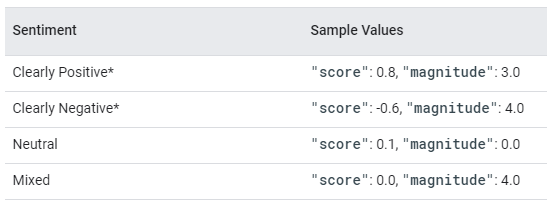

 ### XI. Tiền xử lý dữ liệu
### Kết hợp mạng nơ-ron 1d tích hợp với dữ liệu
### - Chuẩn hóa tuổi, số lượng, phí, số lượng video và số lượng ảnh
### - Tạo vector one-hot gồm loại vật nuôi, giới tính, màu sắc, độ trưởng thành, kích thước, lông, độ dài, đã tiêm phòng, đã tẩy giun, tiệt trùng, sức khỏe, giống, trạng thái và tên

In [ ]:
print(f'Columns in train data before preprocessing:\n\n {train.columns.to_list()}')

In [ ]:
def limit_column(train, test, column_name, values):
    train[column_name] = train[column_name].apply(lambda x: x if x in values else 'Other')
    test[column_name] = test[column_name].apply(lambda x: x if x in values else 'Other')

limit_column(train, test, 'Breed1', test['Breed1'].value_counts().index[:3].to_list())
limit_column(train, test, 'Breed2', test['Breed2'].value_counts().index[:4].to_list())
limit_column(train, test, 'State', test['State'].value_counts().index[:3].to_list())

### XII. Tiền xử lý để phù hợp với mô hình mạng nơ-ron 
###      + Tiêu chuẩn hóa
###      + Mã hóa one-hot
     

In [ ]:

from sklearn import preprocessing

def preprocess_all(train):
    train['Name'] = train['Name'].apply(lambda x: 'Defined' if x != 'Not defined' else x)

    
    normalization_columns = ['Age', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt']
    x = train[normalization_columns].values
    scaler = preprocessing.MinMaxScaler()
    x_scaled = scaler.fit_transform(x)
    train[normalization_columns] = pd.DataFrame(x_scaled, columns=normalization_columns)

    
    dummies_columns = ['Type', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Breed1', 'Breed2', 'State', 'Name']
    train = pd.get_dummies(train, columns=dummies_columns)
    
    train.drop(['RescuerID', 'Description', 'PetID'], axis = 1, inplace = True)
    
    return train

train_labels = train['AdoptionSpeed']    
train.drop(['AdoptionSpeed', 'Description_magnitude', 'Description_score'], axis = 1, inplace = True)

In [ ]:
train = preprocess_all(train)
test = preprocess_all(test)

X_train, Y_train, X_test = train.values, train_labels.values, test.values
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
print(f'Columns in train data after preprocessing:\n\n {train.columns.to_list()}')

### XIII. Xây dựng và huấn luyện mô hình

### Dự đoán: tốc độ chấp nhận bằng mạng tích chập 1D. Nó sẽ chạy qua 5 lớp tích chập 1D với chuẩn hóa hàng loạt cũng như bỏ qua sau mỗi lớp để ngăn chặn việc trang bị quá mức và sau đó nó sẽ chạy qua 4 lớp khác của mạng được kết nối đầy đủ với lớp cuối cùng có 5 nút tương ứng với các lớp mục tiêu.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Conv1D, Flatten

model = Sequential()

model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape = (X_train[0].shape[0], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(filters=512, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(filters=1024, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

model.summary()

### Tiếp tục huấn luyện mô hình

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

### IVX. Đánh giá: Mô hình đang hoạt động khá tệ. Độ chính xác khoảng 35%. 

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train loss', 'Validation loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss (categorical crossentropy)')

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10,7))
train_predictions = model.predict_classes(X_train)
matrix = confusion_matrix(Y_train, train_predictions)
ax = sns.heatmap(matrix, annot=True, fmt='d', linewidths=0.25)
_ = ax.set(xlabel='Predicted class', ylabel='Actual class')

### XV. Đánh giá: Trong nhiều trường hợp, mô hình đã khá gần với lớp thực tế, không dự đoán rằng vật nuôi sẽ được nhận nuôi vào cùng một ngày sau khi được liệt kê vì số lượng trường hợp như vậy trong quá trình huấn luyện thấp.



In [ ]:
from sklearn.metrics import cohen_kappa_score

sc = cohen_kappa_score(train_predictions, Y_train, weights = 'quadratic')
print(f'Quadratic kappa score: {sc}')

### XVI. Xây dựng mô hình kết nối đầy đủ

### Thử nghiệm với mô hình khác chỉ sử dụng các lớp được kết nối đầy đủ

In [ ]:
model = Sequential()

model.add(Flatten(input_shape = (X_train[0].shape[0], 1)))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(5, activation='softmax'))

model.summary()

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=15, validation_split=0.2)

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train loss', 'Validation loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss (categorical crossentropy)')

In [ ]:
from sklearn.metrics import cohen_kappa_score

train_predictions = model.predict_classes(X_train)
sc = cohen_kappa_score(train_predictions, Y_train, weights = 'quadratic')
print(f'Quadratic kappa score: {sc}')

### XVII. Sử dụng mô hình mạng nơ-ron được kết nối đầy đủ có thể quan sát kết quả tương tự với việc mất xác thực có nhiều đột biến hơn trong 1D CNN.

In [ ]:
test_predictions = model.predict_classes(X_test)
my_submission = pd.DataFrame({'PetID': range(len(test_predictions)), 'AdoptionSpeed': test_predictions})
my_submission['PetID'] = test_ids
my_submission.to_csv('submission.csv', index=False)